# Machine Learning Script
**Applying machine learning techniques to the dataset**

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

**Change the directory to dataset directory**

In [4]:
cd "D:\University\FIT3162\Project\Fake-News-Detection\Machine Learning"

D:\University\FIT3162\Project\Fake-News-Detection\Machine Learning


In [5]:
df = pd.read_csv('dataset.csv', index_col = 0)

In [6]:
df.head(2)

,clean_title,created_utc,domain,id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,comment_sentiment,post_sentiment,domain_rank
0,can i still cash in my brain needs to rest,2017-06-17 12:58:22,self.SubredditSimulator,6hrnqx,20,17,subredditsimulator,Can I still cash in my brain needs to rest,0.9,0,-0.034000,0.0,1000001
1,how did the wheat say to its son photoshop,2019-07-27 18:58:22,self.SubredditSimulator,cig6ey,20,3,subredditsimulator,How did the wheat say to its son Photoshop?,1.0,0,0.196715,0.0,1000001


##### Splitting the Dataset into Test and Traning Set
There is an approximately equal distribution of classes, Hence no dataset imbalance occurs.
Which means no Downsampling is required

In [7]:
from sklearn.model_selection import train_test_split
# separate array into features and target
X = np.array(df[['comment_sentiment','post_sentiment', 'domain_rank', 'upvote_ratio']])
Y = np.array(df['2_way_label'])
# 75:25 ratio of training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123)

#### Perform Rescaling of Data using MinMaxScaler
Rescaling of data is essential for better performance of many supervised learning techniques

In [8]:
# Rescale data (between 0 and 1)
import scipy
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
np.set_printoptions(precision=3)
print(X_train[0:5,:])

[[4.645e-01 4.991e-01 1.000e+00 8.542e-01]
 [5.248e-01 6.045e-01 1.000e+00 8.750e-01]
 [5.798e-01 6.649e-01 1.997e-03 9.583e-01]
 [4.661e-01 4.991e-01 1.000e+00 9.792e-01]
 [5.506e-01 7.163e-01 8.330e-04 9.167e-01]]


#### Logistic Regression Model Classifier

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.77


#### Decision Tree

In [10]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.85
Accuracy of Decision Tree classifier on test set: 0.84


##### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.78


#### Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.77
Accuracy of GNB classifier on test set: 0.77


##### Support Vector Machine

In [13]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.79


#### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=123)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.80
Accuracy of RF classifier on test set: 0.79


### Evaluation of the Decision Tree Model

#### Confusion Matrix and Classification Reports for Decision Tree

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1066  196]
 [ 215 1023]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1262
           1       0.84      0.83      0.83      1238

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



In [17]:
# To improve the look of confusion matrix the following code was adapted.
# https://medium.com/swlh/how-to-code-and-evaluate-of-decision-trees-2d94093b3c1a
def create_matrix(y_test, y_pred, class_names=None, model_name=None):
    fig, ax = plt.subplots(figsize=(8,8))
    cf = confusion_matrix(y_test, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    if class_names:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    else:
        class_names = set(y_true)
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    thresh = cf.max() / 2.0
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
            horizontalalignment="center",
            color="white" if cf[i, j] > thresh else "black",)
    plt.colorbar()

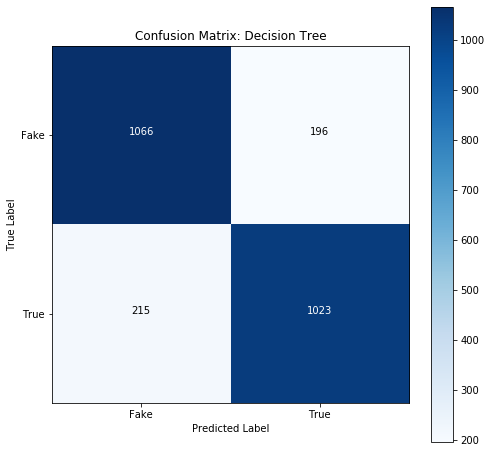

In [18]:
create_matrix(y_test, pred, ['Fake', 'True'], "Decision Tree")
plt.show()

##### ROC Curve

In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_train_score = clf.predict_proba(X_train)[:, 1]
y_test_score = clf.predict_proba(X_test)[:, 1]
auc_train = roc_auc_score(y_train, y_train_score)
auc_test = roc_auc_score(y_test, y_test_score)

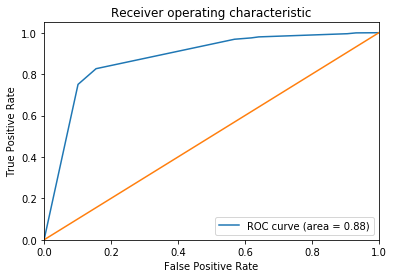

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_test_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label= "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [21]:
# Feature Importance in Decision Tree
index = ['comment_sentiment','post_sentiment', 'domain_rank', 'upvote_ratio']
feature_imp = pd.Series(clf.feature_importances_,index=index).sort_values(ascending=False)

No handles with labels found to put in legend.


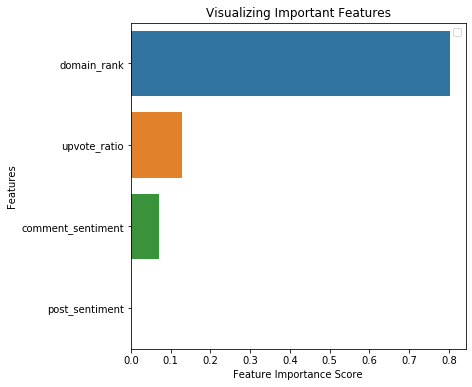

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Limitations:<br>
1) Subset of dataset is used. Tried multiprocessing to speed up but memory issues.<br>
2) Performing Parameter Tuning for the supervised learning methods to improve performance<br>
3) Deploying the model to create a webpage if time allows.<br>


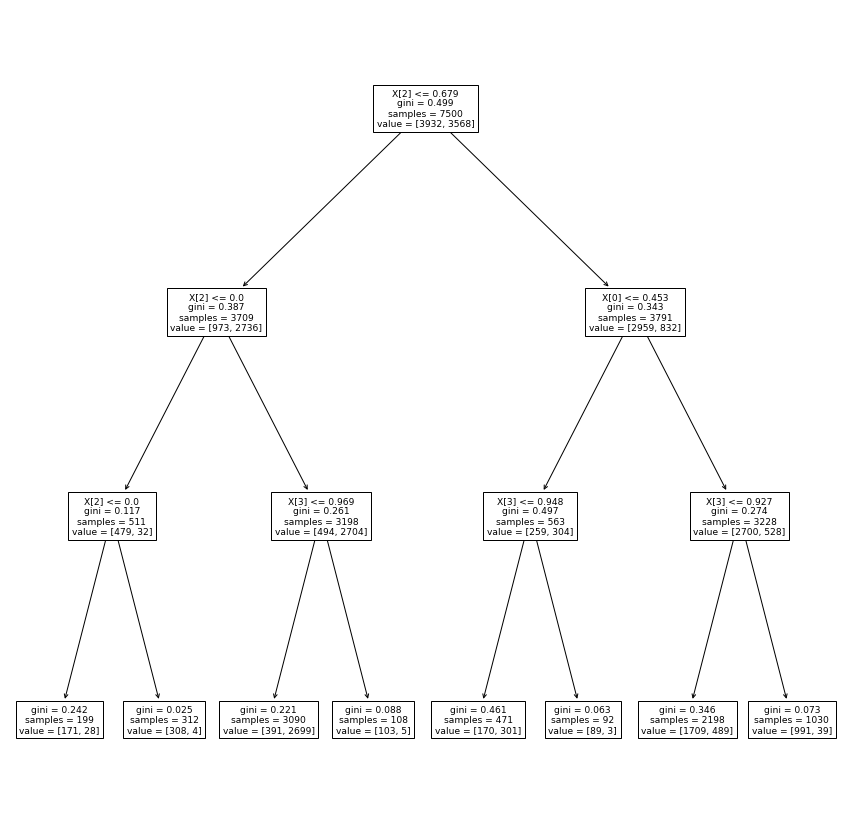

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
tree.plot_tree(clf)
plt.show()

### Parameter Optimisation

In [19]:
import sklearn
print(sklearn.__version__)

0.18.1


### Pickle to Save the Model 

In [24]:
import pickle

In [25]:
filename = "model_pickle.pkl"  

with open(filename, 'wb') as file:  
    pickle.dump(clf, file)
file.close()

### Pickle to Save Scaler

In [26]:
filename = "scaler.pkl"  

with open(filename, 'wb') as file:  
    pickle.dump(scaler, file)
file.close()